In [76]:
import yfinance as yf
import pandas as pd
import numpy as np
import openpyxl
import glob

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

from fpdf import FPDF
pdf = FPDF()
import img2pdf

In [73]:
date = '2022-10-22'
fp_in = f'../data/tagui/gc_tickers_{date}.csv'
fp_out = f'../data/yfinance/gc_ticker_data_{date}.xlsx'
fp_plots = f'../data/plots'
pdf_path = f'../data/pdf'

In [3]:
ls = ['PEGY', 'PSX', 'FNB', 'MPLX', 'DRI', 'WFRD', 'IBRX', 'PRVB', 'FFBC', 'STGW', 'LBAI', 
      'CVSG', 'QNST', 'ASND', 'FIF', 'RPHM', 'NBPE', 'NRC', 'ART', 'ULBI', 'AC', 'CFBK']

In [4]:
info = {}
df = pd.DataFrame()
for i in ls:
    stock = yf.Ticker(f'{i}') # returns a DataFrame
    info[i] = stock.info
    hist = stock.history(period="2y")
    hist['Stock'] = i
    df = pd.concat([df, hist], axis=0)
    # print(df.shape)
    # break
df.sample(5)

- CVSG: No data found for this date range, symbol may be delisted
- NBPE: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock,Adj Close
Date,,,,,,,,,
2020-01-28 00:00:00-05:00,14.300000,14.500000,13.860000,13.900000,516000.0,0.0,0.0,QNST,NaN
2006-09-07 00:00:00-04:00,7.650366,7.690552,7.580041,7.610180,77000.0,0.0,0.0,FFBC,NaN
1985-02-04 00:00:00-05:00,0.000000,4.145600,3.901741,3.983028,7200.0,0.0,0.0,PEGY,NaN
2014-06-11 00:00:00-04:00,11.797252,11.831348,11.336954,11.643819,19700.0,0.0,0.0,NRC,NaN
2011-07-12 00:00:00-04:00,6.374729,6.507668,6.362069,6.488677,1176300.0,0.0,0.0,FNB,NaN


In [5]:
tagui_df = pd.read_csv(fp_in)
tagui_df.head()

,TICKER,NAME,INDUSTRY,EXCHANGE,SMA200PRICE,PRICE,VOLUME
0,AIRI,Air Industries Group,Aerospace,NYSE,$0.82,$5.19,"7,766"
1,VLCN,Volcon,Auto/Tires/Trucks,NYSE,$1.74,$1.63,"71,854"
2,FNGR,FingerMotion,Business Services,NYSE,$2.06,$7.03,2.00 million
3,STGW,Stagwell,Business Services,NYSE,$6.81,$7.54,"356,397"
4,NRC,National Research,Business Services,NYSE,$36.92,$40.64,"38,090"


In [40]:
tmp = df.copy()
tmp = tmp.reset_index()
tmp['Date'] = tmp['Date'].astype(str)

In [41]:
# tmp.to_excel(fp)

In [42]:
tmp.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Adj Close'], inplace = True, axis=1)
tmp.head()

,Date,Close,Volume,Stock
0,1981-11-18 00:00:00-05:00,1.734107,47813.0,PEGY
1,1981-11-19 00:00:00-05:00,1.661853,59963.0,PEGY
2,1981-11-20 00:00:00-05:00,1.770234,31275.0,PEGY
3,1981-11-23 00:00:00-05:00,1.697979,8213.0,PEGY
4,1981-11-24 00:00:00-05:00,1.661853,13050.0,PEGY


In [43]:
tmp = tmp.merge(tagui_df, left_on='Stock',right_on='TICKER', how='left')
tmp = tmp[['Date', 'Close', 'Volume', 'TICKER', 'NAME', 'INDUSTRY', 'VOLUME']]
tmp.head()

,Date,Close,Volume,TICKER,NAME,INDUSTRY,VOLUME
0,1981-11-18 00:00:00-05:00,1.734107,47813.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million
1,1981-11-19 00:00:00-05:00,1.661853,59963.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million
2,1981-11-20 00:00:00-05:00,1.770234,31275.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million
3,1981-11-23 00:00:00-05:00,1.697979,8213.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million
4,1981-11-24 00:00:00-05:00,1.661853,13050.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million


In [44]:
tmp['Date'] = pd.to_datetime(tmp['Date'], format='%Y-%m-%d %H:%M:%S')
tmp.head()

,Date,Close,Volume,TICKER,NAME,INDUSTRY,VOLUME
0,1981-11-18 00:00:00-05:00,1.734107,47813.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million
1,1981-11-19 00:00:00-05:00,1.661853,59963.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million
2,1981-11-20 00:00:00-05:00,1.770234,31275.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million
3,1981-11-23 00:00:00-05:00,1.697979,8213.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million
4,1981-11-24 00:00:00-05:00,1.661853,13050.0,PEGY,Pineapple Energy,Oils/Energy,15.06 million


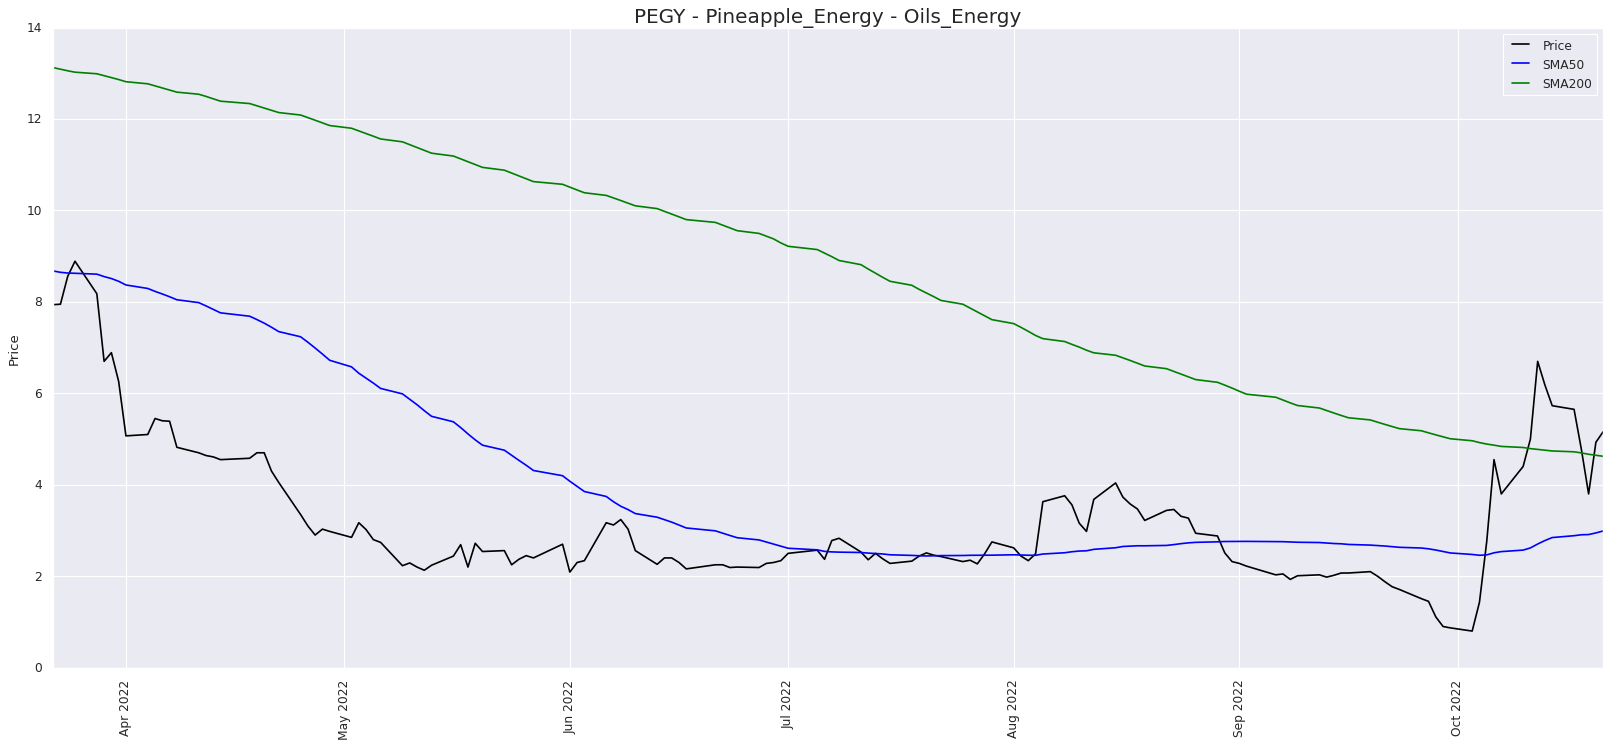

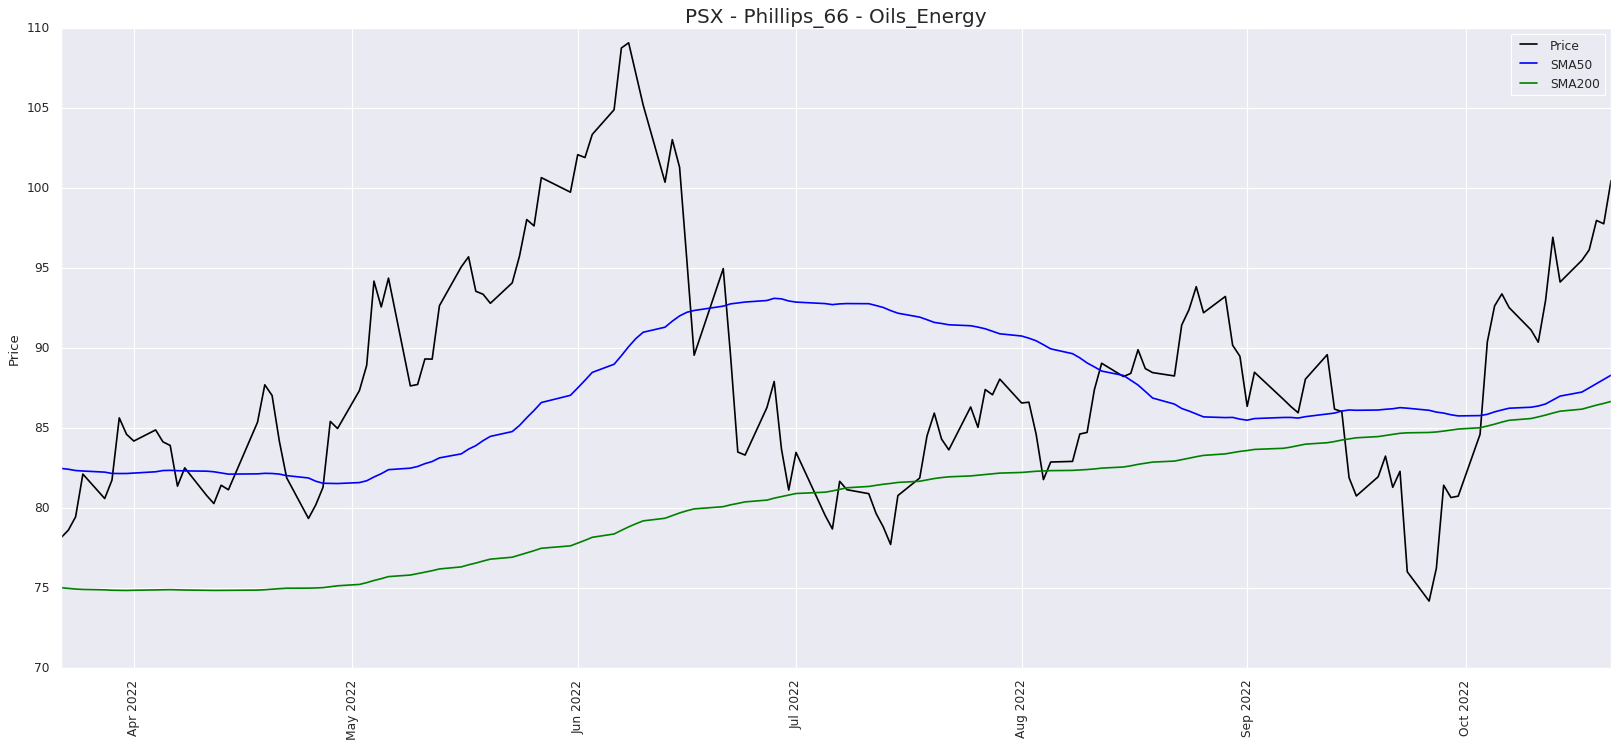

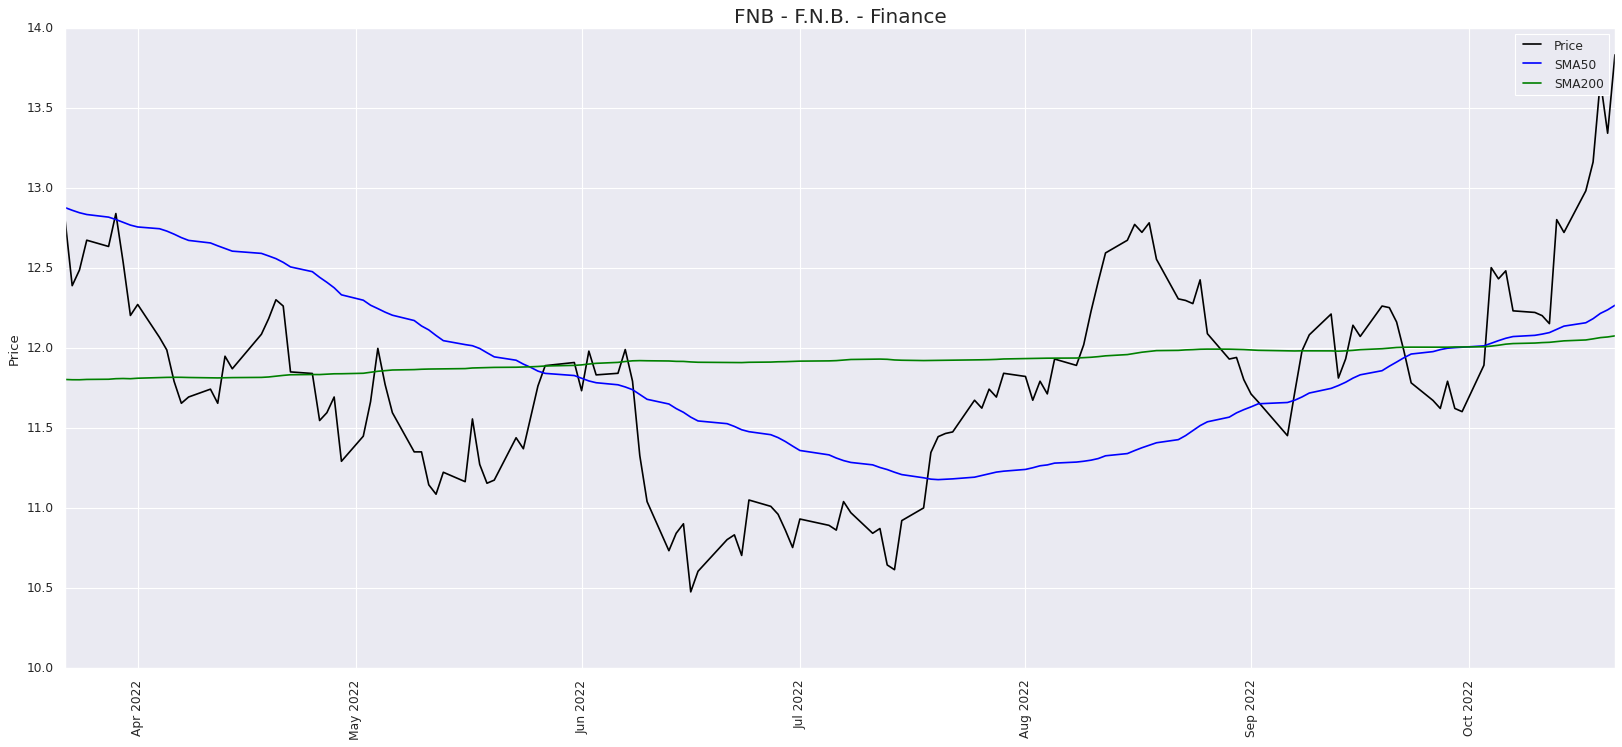

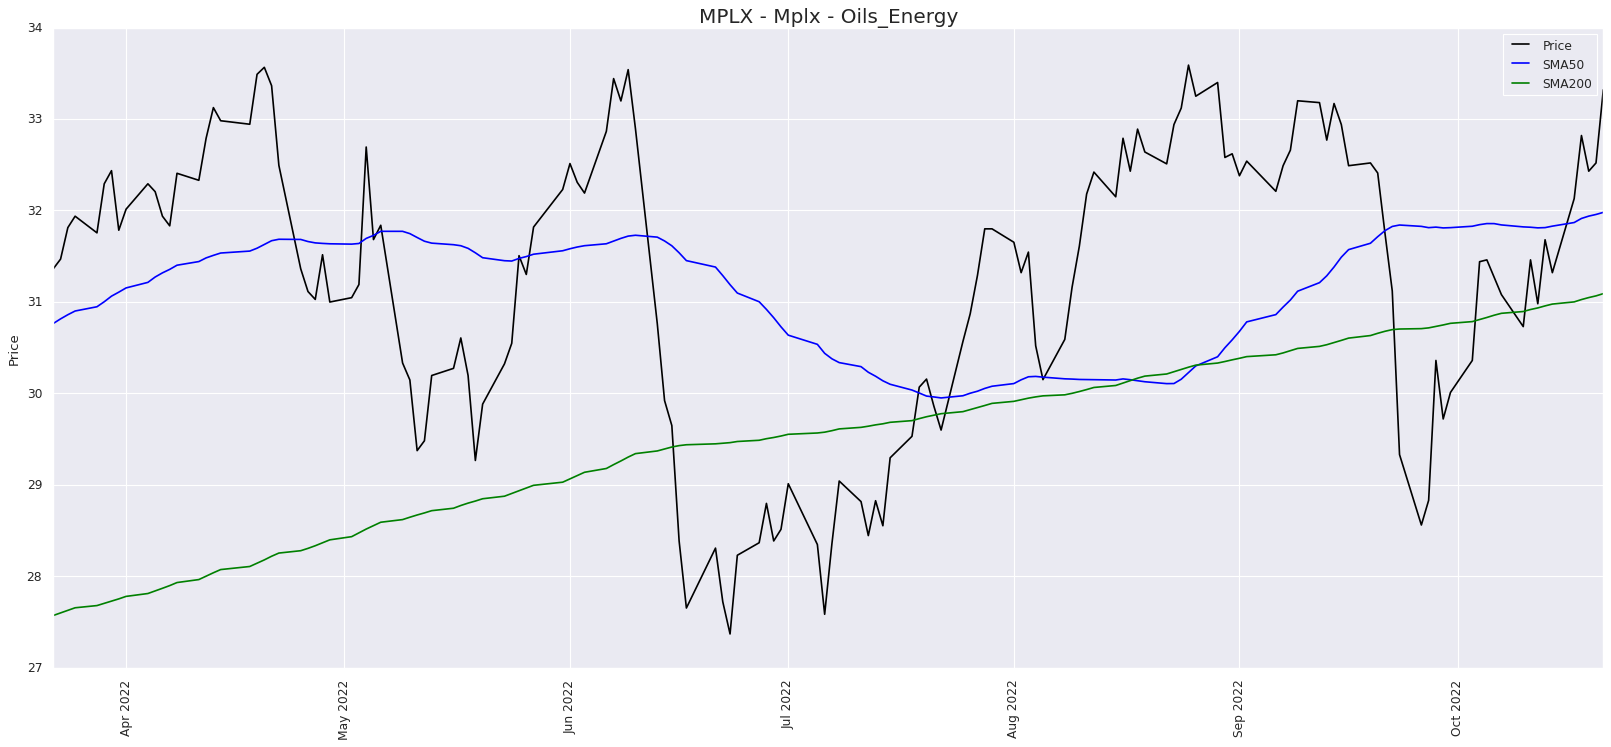

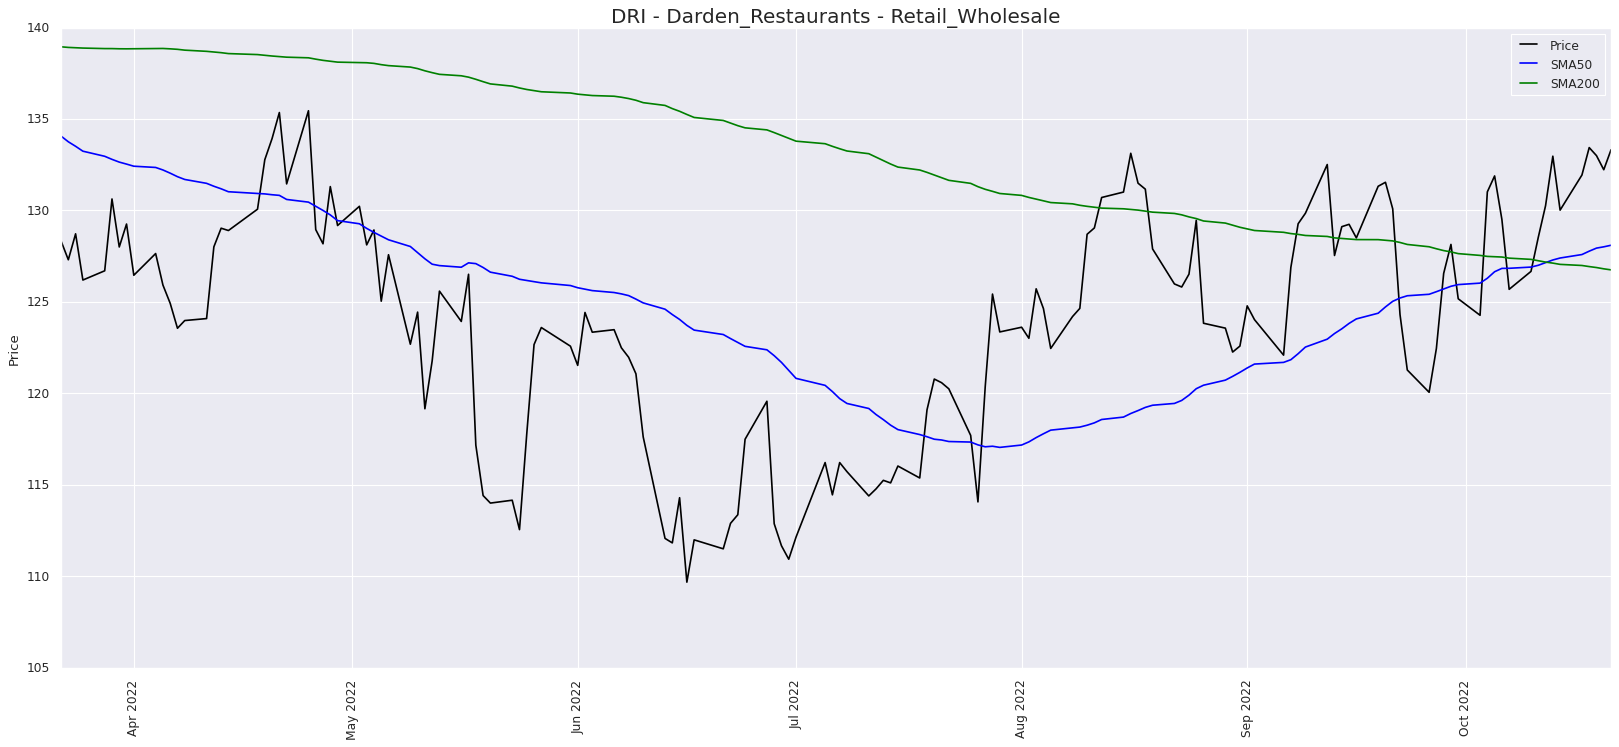

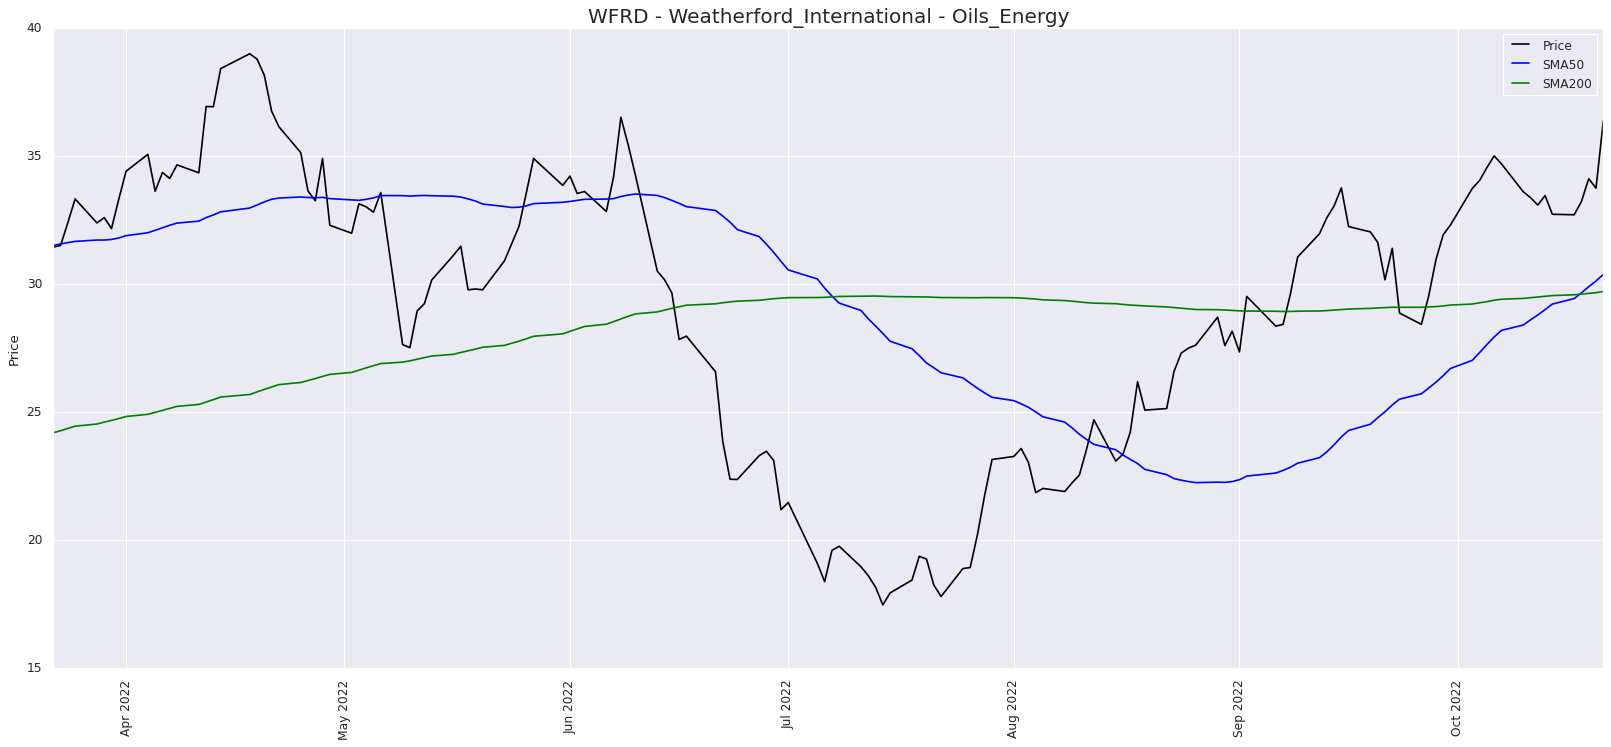

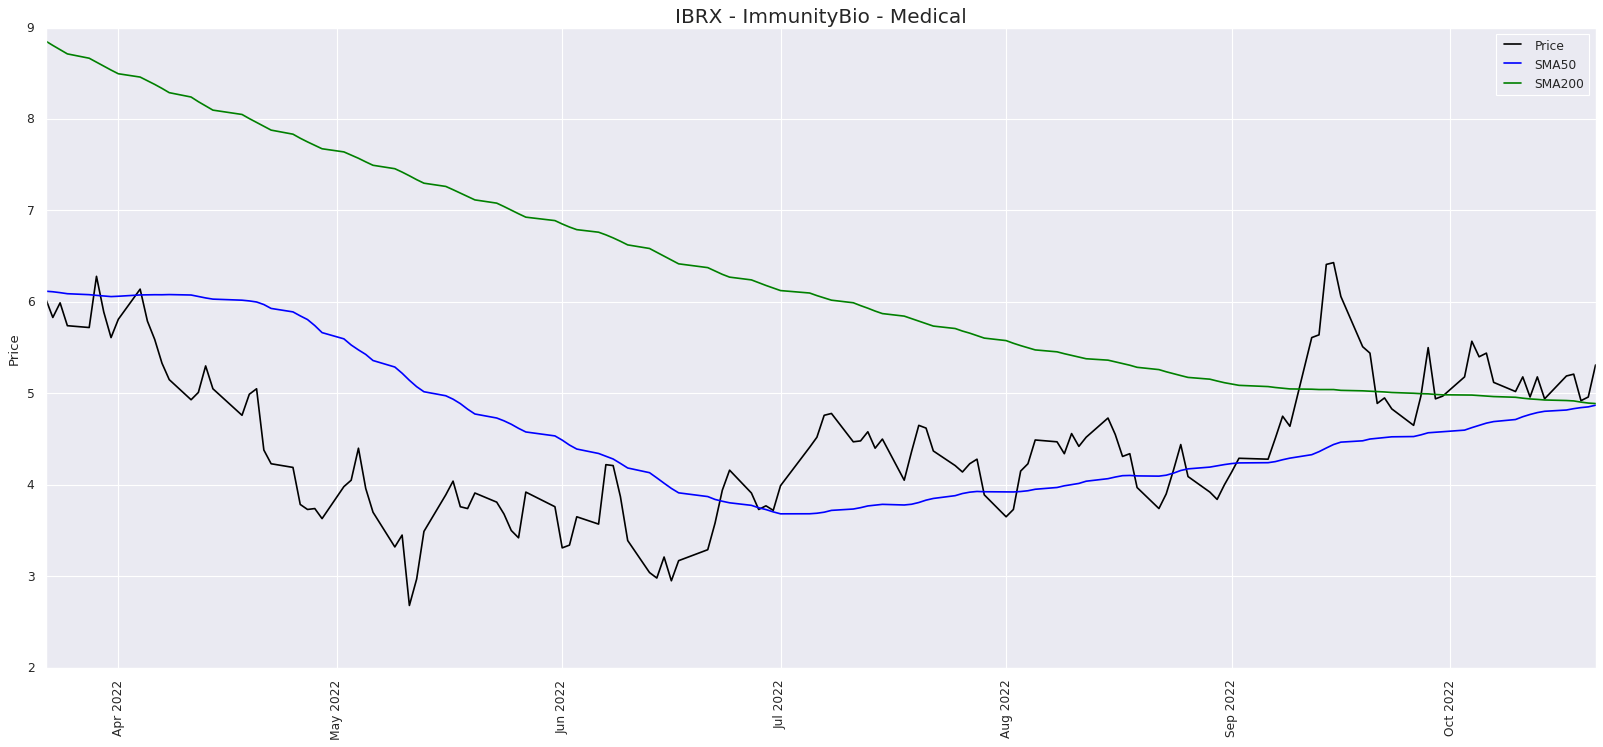

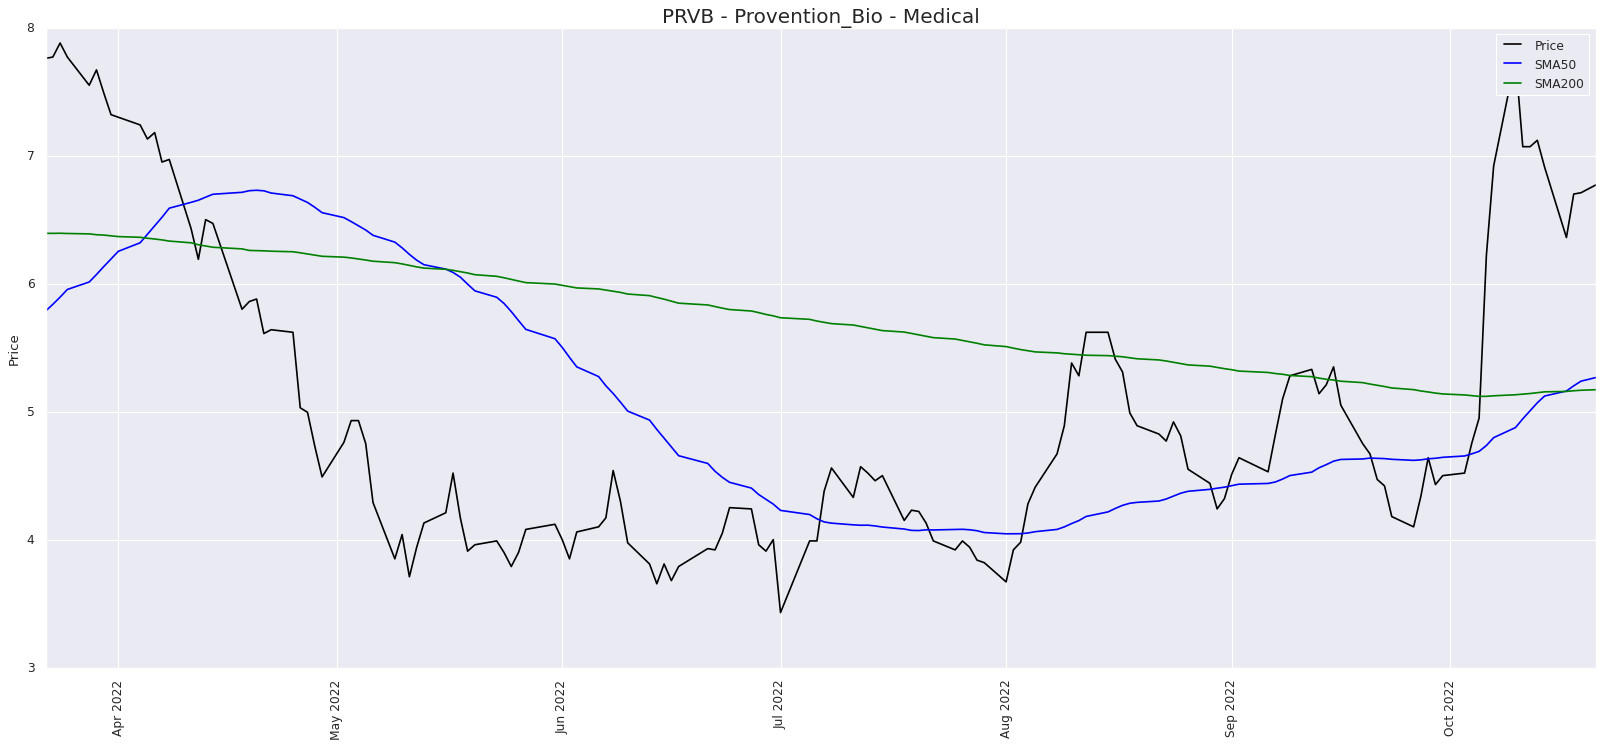

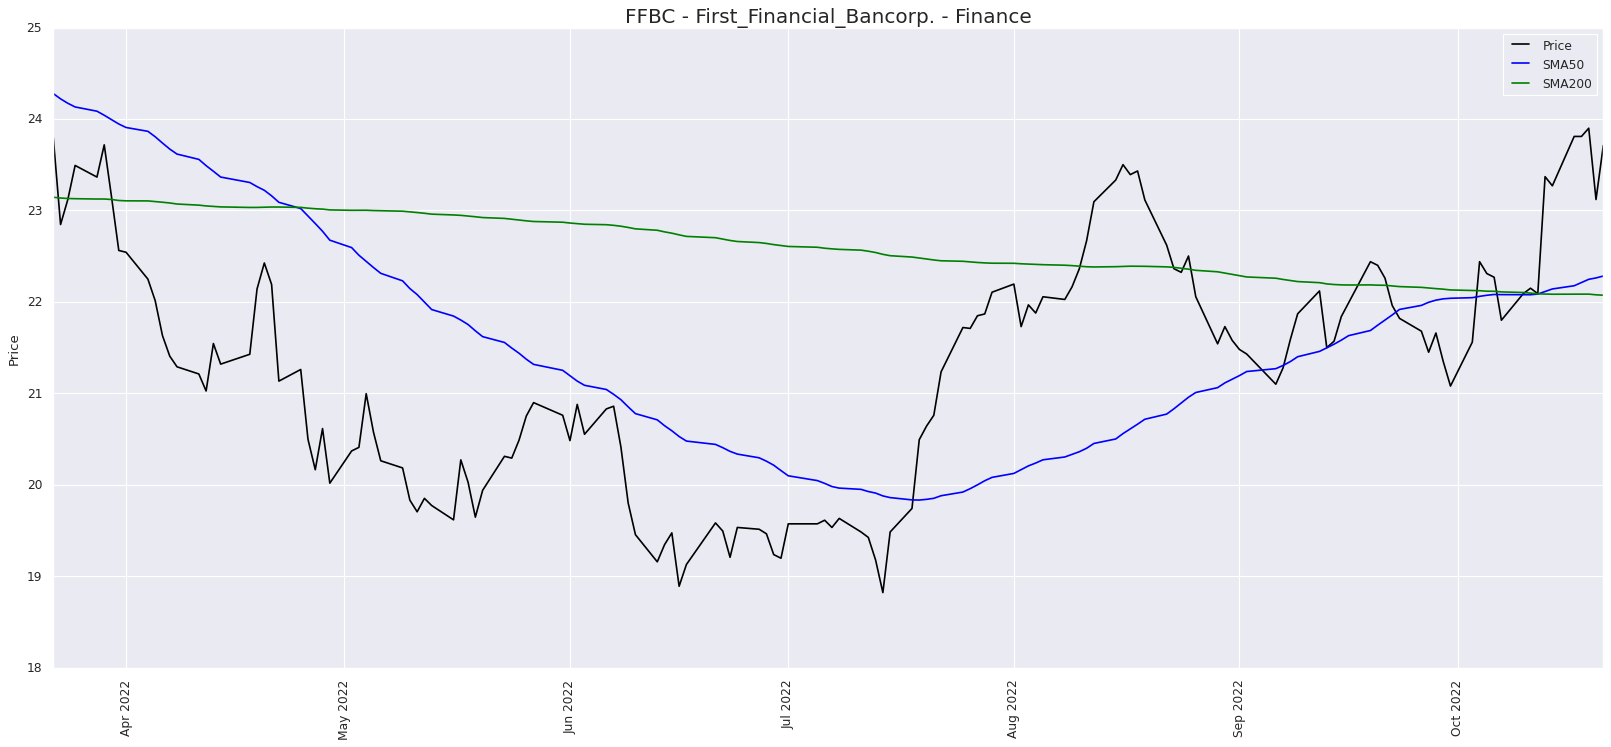

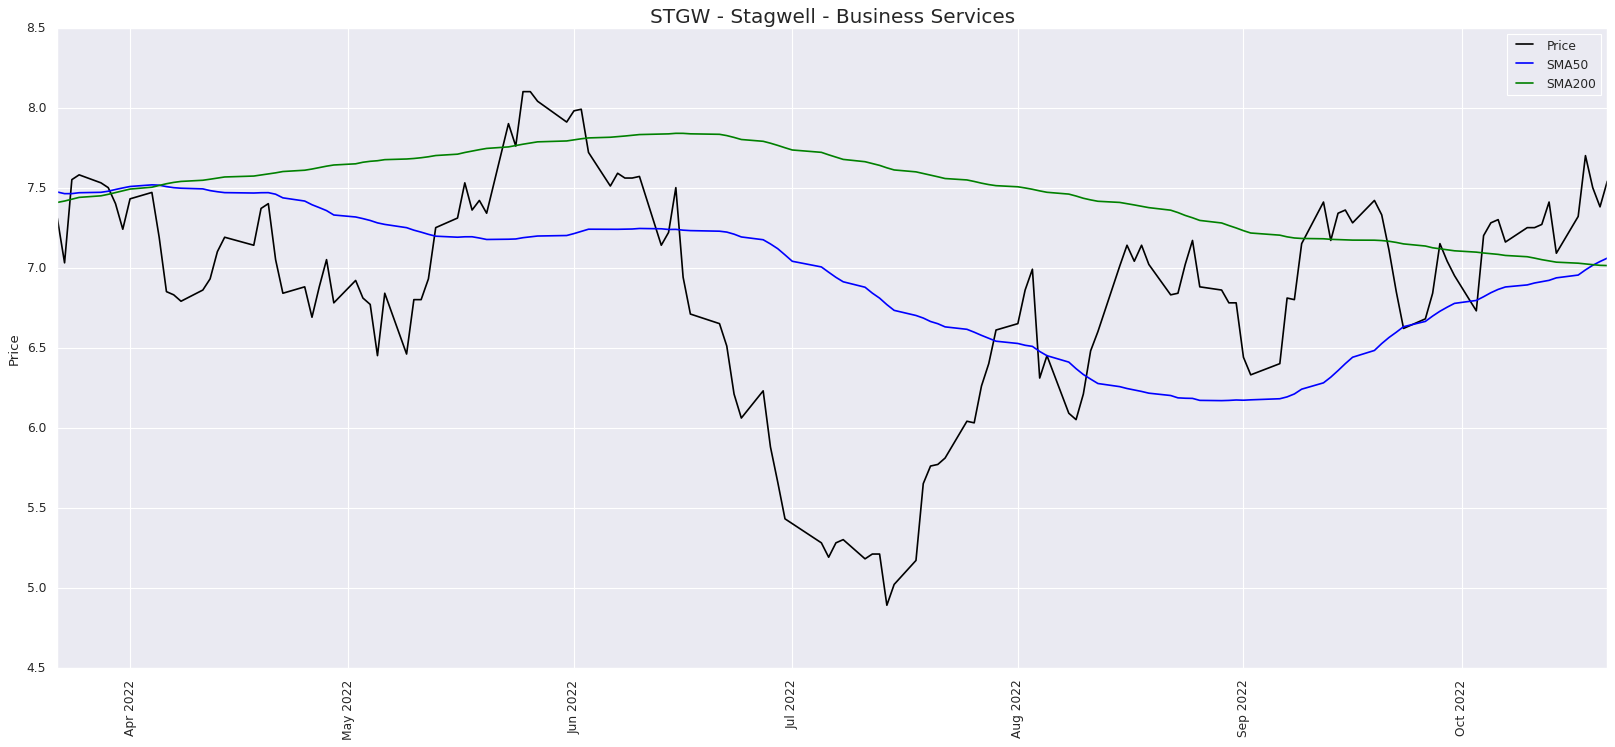

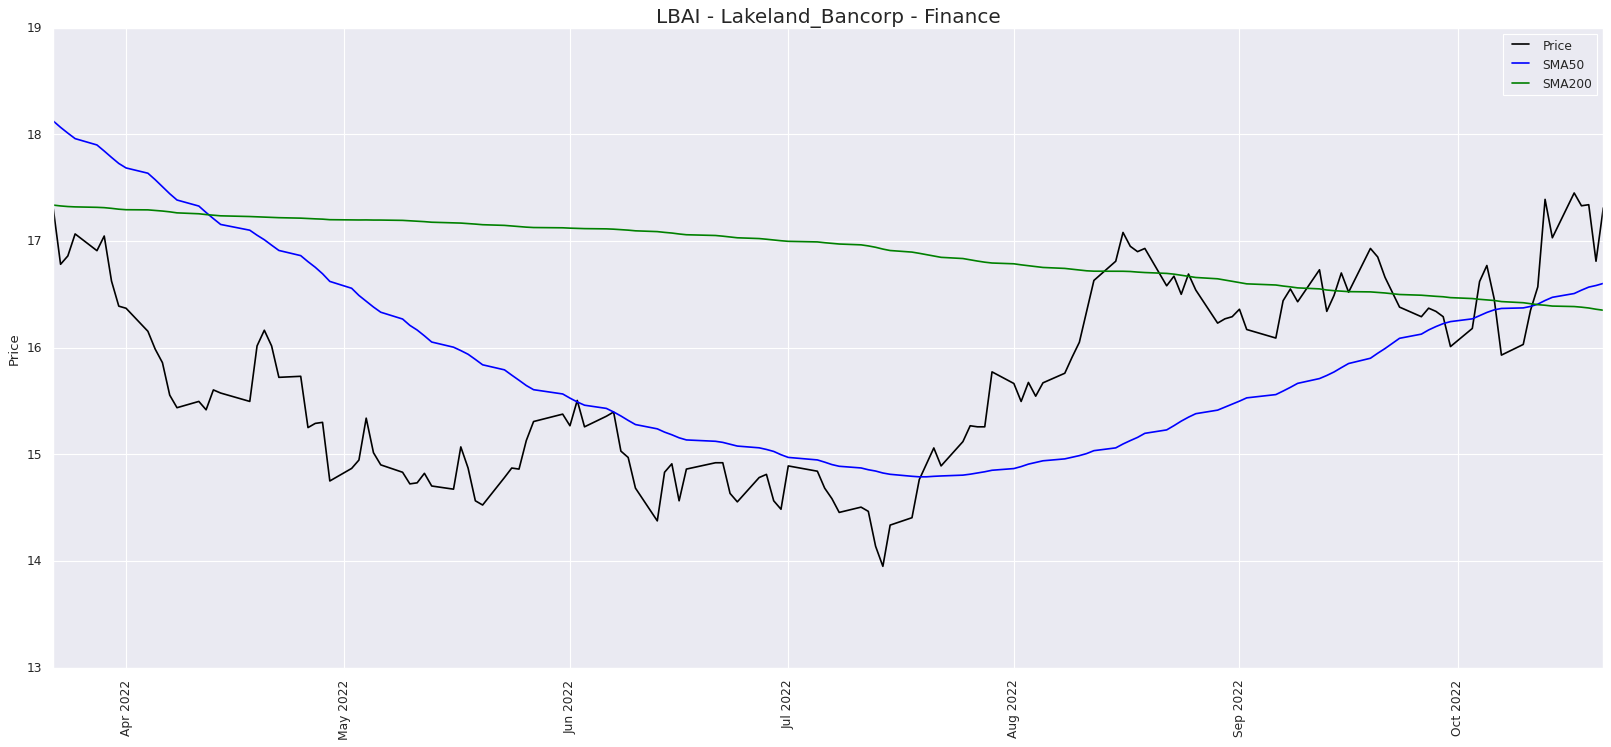

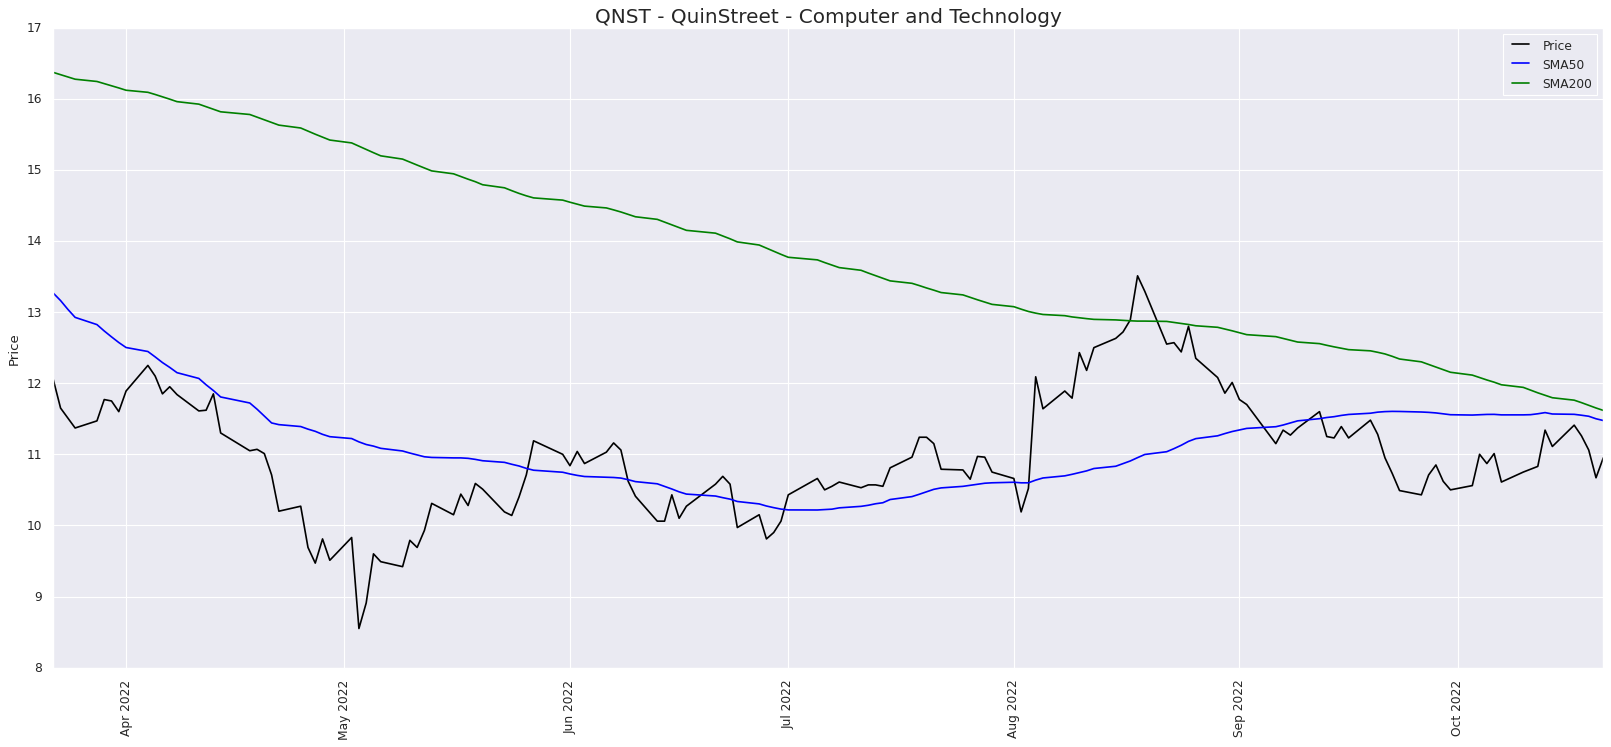

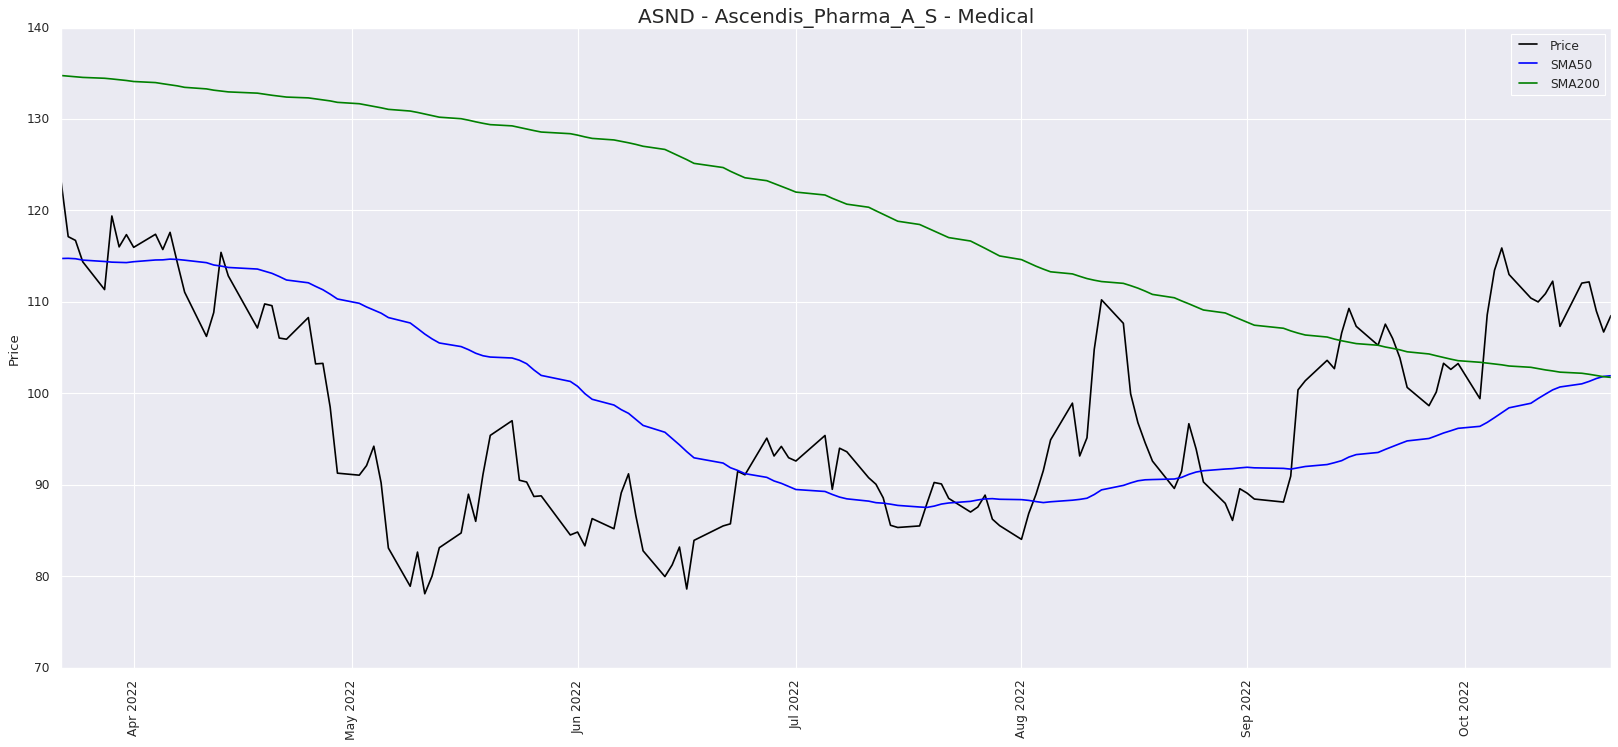

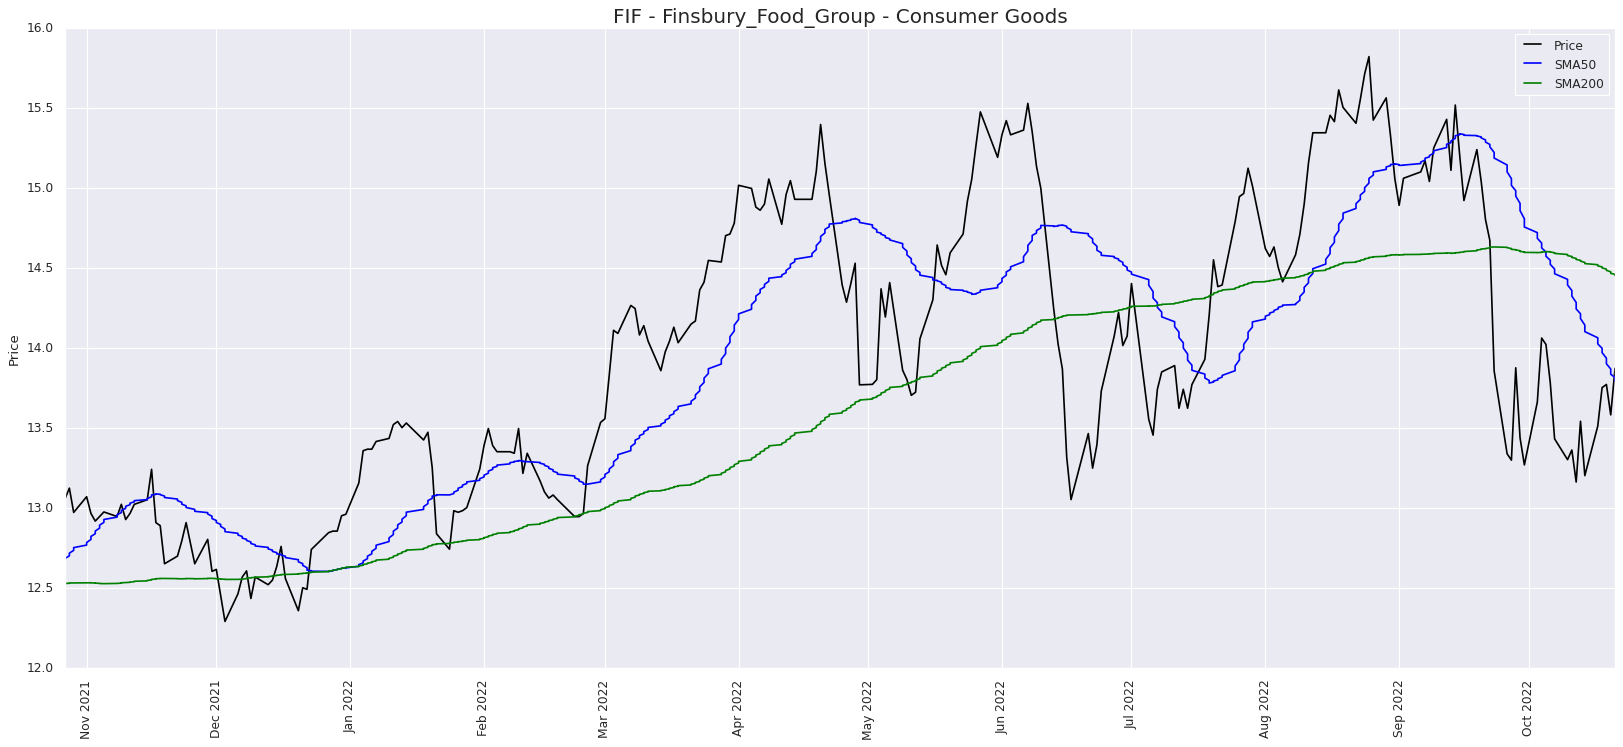

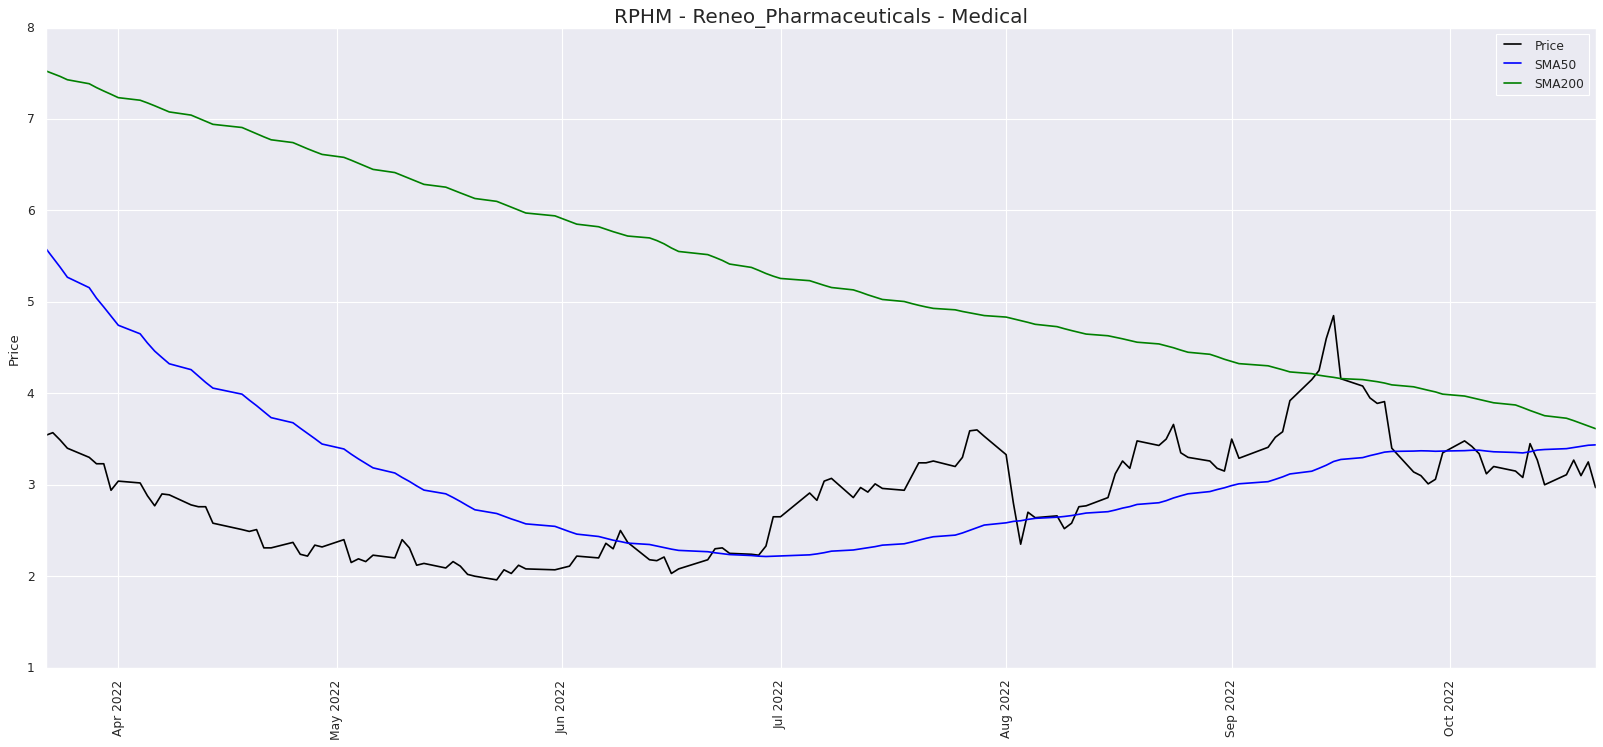

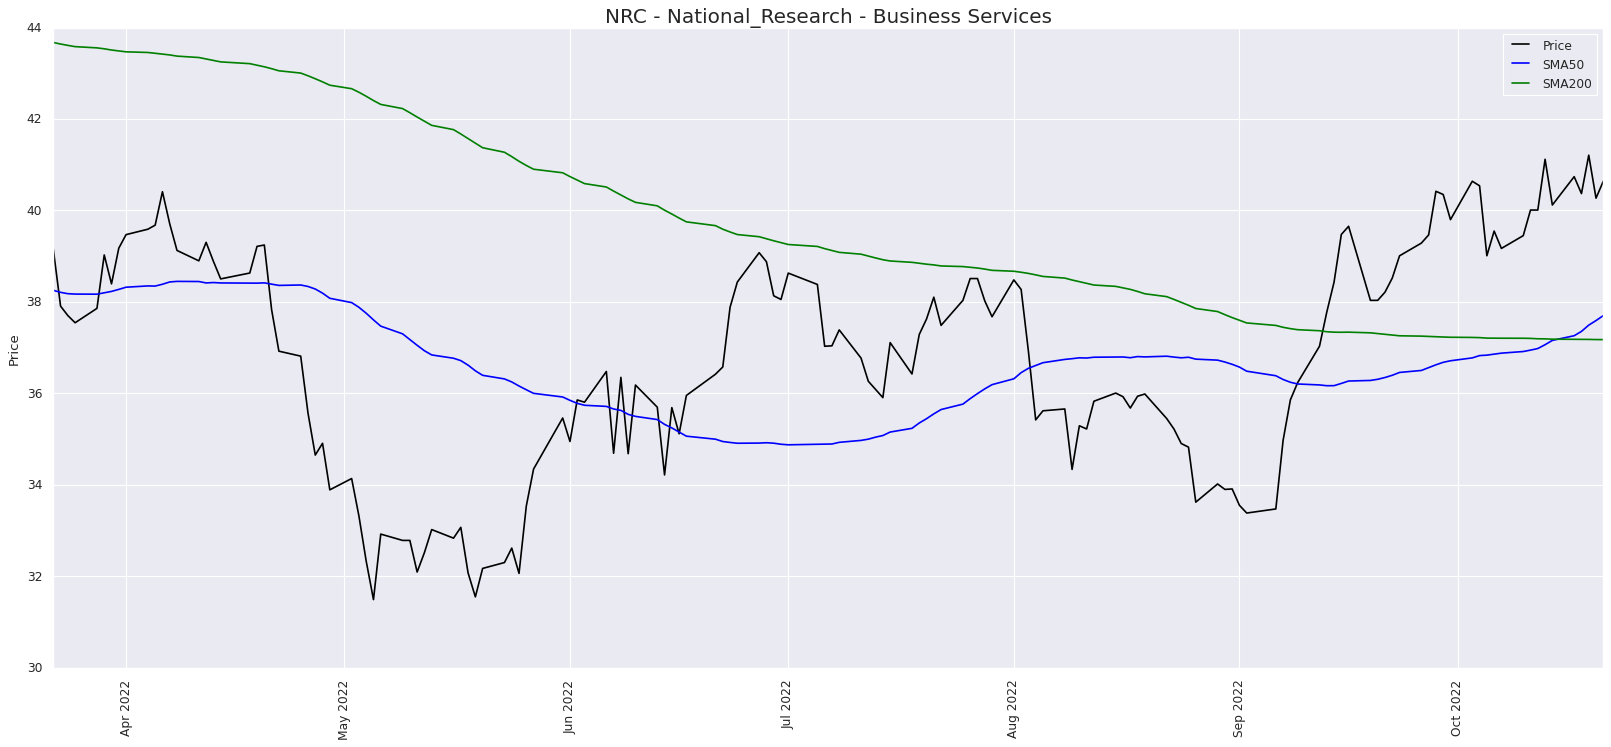

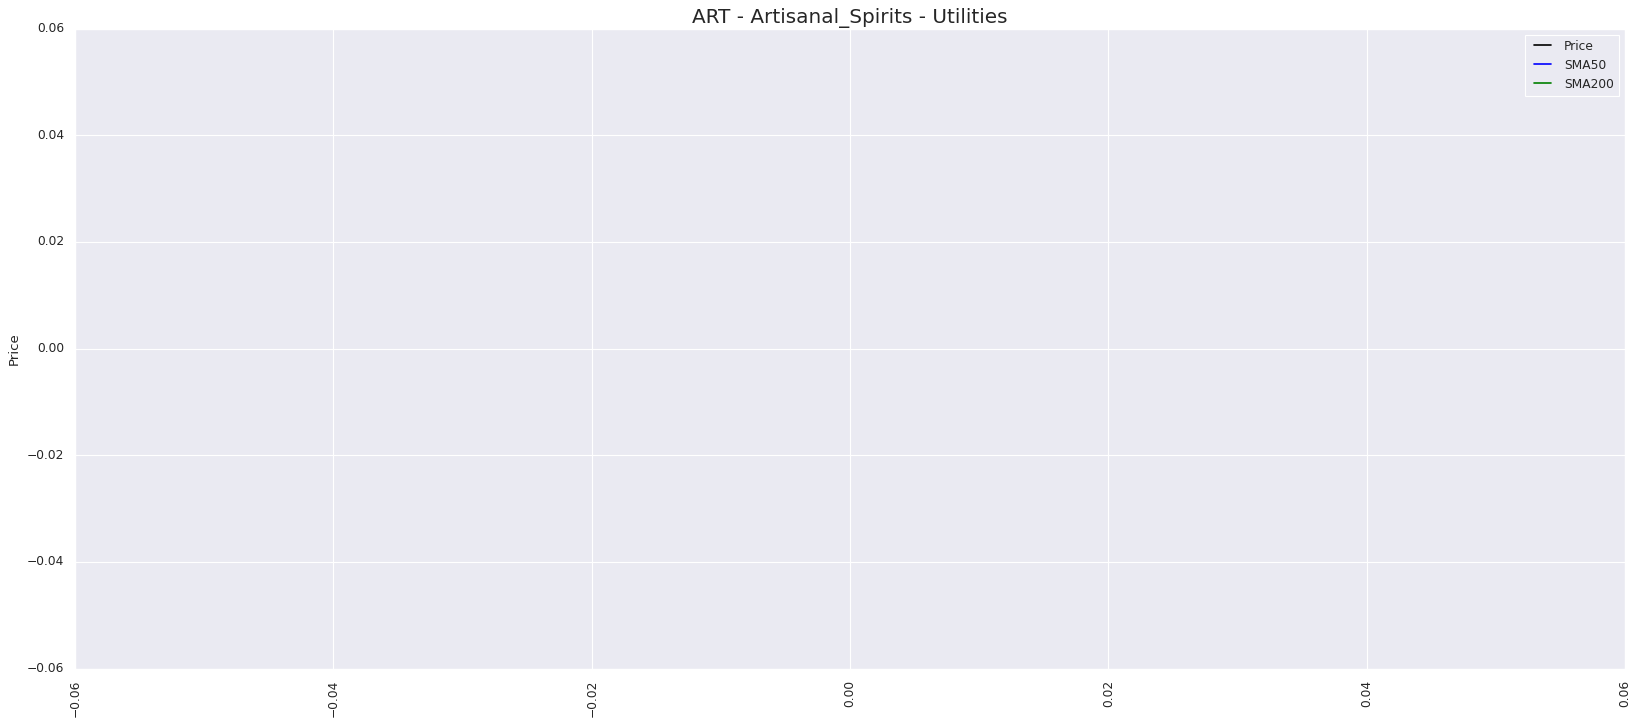

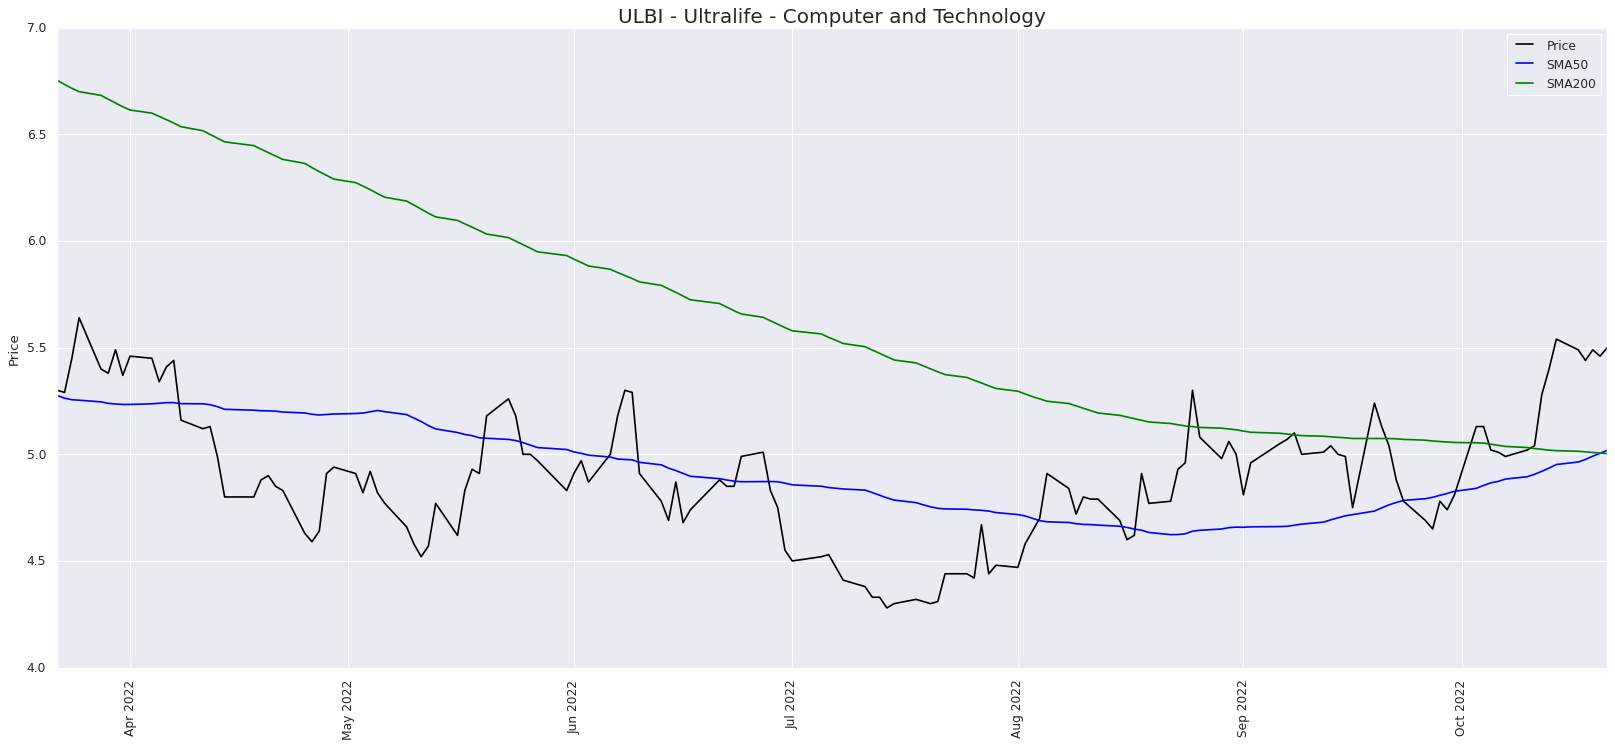

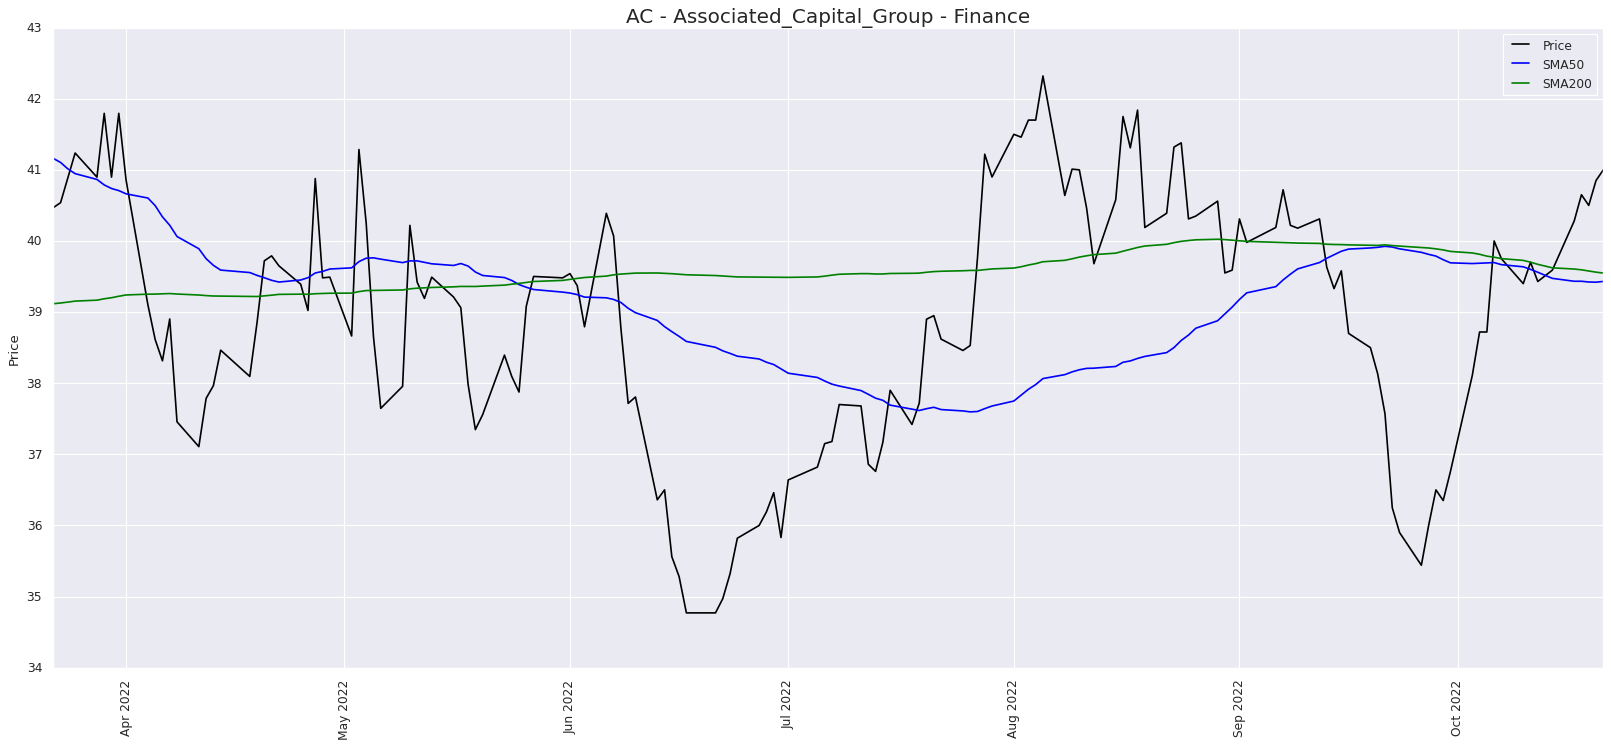

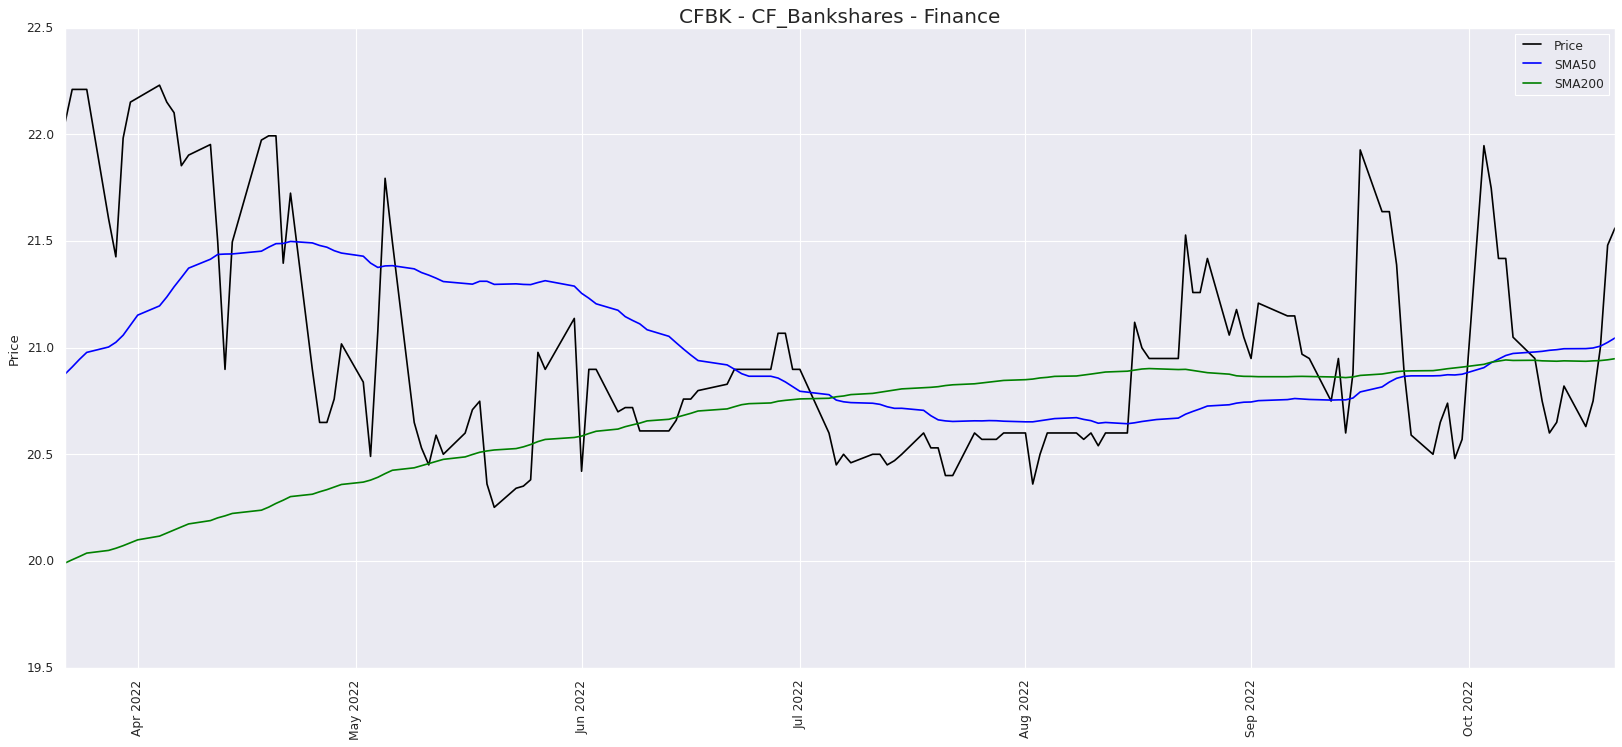

In [95]:
# lsTest = ['PEGY', 'PSX']
for t in ls:
    subset_df = tmp.copy()
    subset_df = subset_df[subset_df.TICKER == t]
    # print(tmp.shape)
    
    if len(subset_df) > 0:
        gc_df = subset_df.copy()
        
        name = gc_df.NAME.unique()[0].replace(' ', '_').replace('/', '_')
        industry = gc_df.INDUSTRY.unique()[0].replace('/', '_')
        
        end_date = max(gc_df.reset_index().Date)
        start_date = end_date - pd.Timedelta(days=500)

        gc_df = gc_df.reset_index()
        gc_df = gc_df[gc_df.Date >= start_date]
        gc_df = gc_df.set_index('Date')

        gc_df['sma50'] = gc_df['Close'].rolling(50, min_periods=50).mean()
        gc_df['sma200'] = gc_df['Close'].rolling(200, min_periods=200).mean()
        gc_df.dropna(inplace=True)   

        plt.figure(figsize=(25,10))
        plt.plot(gc_df["Close"], color="black", label="Price")
        plt.plot(gc_df["sma50"], color="blue", label="SMA50")
        plt.plot(gc_df["sma200"], color="green", label="SMA200")
        plt.ylabel("Price")
        plt.xticks(rotation=90)
        plt.title(f"{t} - {name} - {industry}", fontsize=18)
        plt.legend()
        
        path = f"{fp_plots}/{t}_{name}_{industry}_{date}.png"
        plt.savefig(path)
        # break
# tmp.head()

In [92]:
# convert all files matching a glob
with open(f"{pdf_path}/golden_croseses_{date}.pdf", "wb") as f:
    f.write(img2pdf.convert(glob.glob(f"{fp_plots}/*.png")))

Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an alpha channel. Computing a separate soft mask (/SMask) image to store transparency in PDF.
Image contains an a